In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDClassifier
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
features = """duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: continuous.
dst_host_same_srv_rate: continuous.
dst_host_diff_srv_rate: continuous.
dst_host_same_src_port_rate: continuous.
dst_host_srv_diff_host_rate: continuous.
dst_host_serror_rate: continuous.
dst_host_srv_serror_rate: continuous.
dst_host_rerror_rate: continuous.
dst_host_srv_rerror_rate: continuous.
"""

In [3]:
f = features.split("\n")
fes = []
for fe in f:
    #print(fe.split(':')[0])
    fes.append(fe.split(':')[0])
fes[:5]

['duration', 'protocol_type', 'service', 'flag', 'src_bytes']

In [ ]:
data = pd.read_csv("kddcup/kddcup.csv", names=fes)
data.head()

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [82]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,...,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03,...,2.329811e+02,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02
std,7.233298e+02,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00,...,6.402094e+01,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.832900e+04,1.379964e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,1.000000e+00,7.479000e+03,...,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


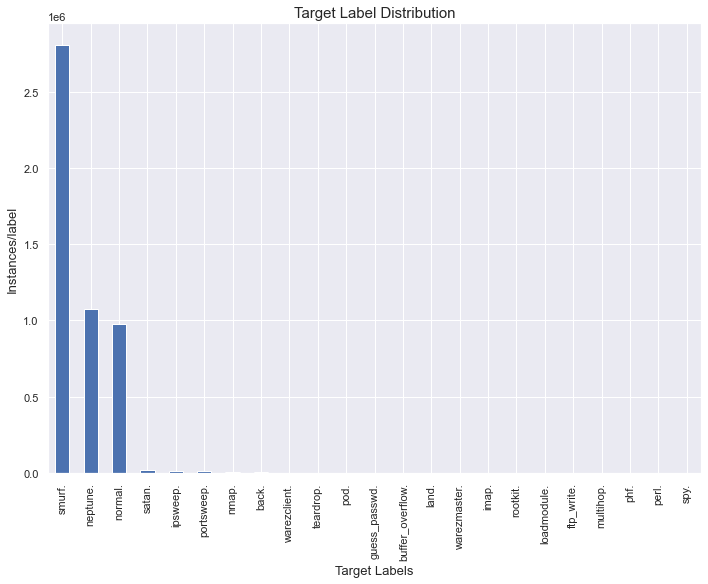

In [83]:
data['label'] = data[""]
data.drop(axis=1, columns=[""])
data['label'].value_counts().plot(kind='bar')
plt.title("Target Label Distribution", fontsize=15)
plt.xlabel("Target Labels", fontsize=13)
plt.ylabel("Instances/label", fontsize=13)
plt.show()

In [98]:
data.duplicated().sum()

0

In [99]:
data.drop_duplicates(inplace=True)

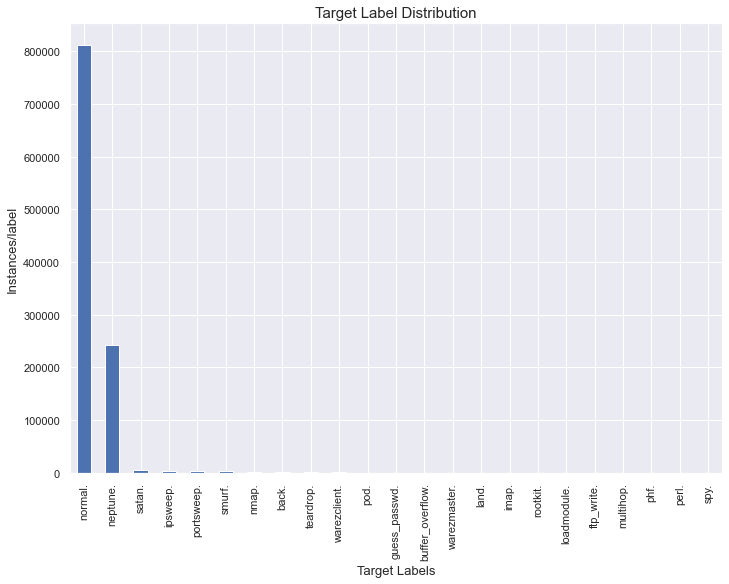

In [100]:
data['label'].value_counts().plot(kind='bar')
plt.title("Target Label Distribution", fontsize=15)
plt.xlabel("Target Labels", fontsize=13)
plt.ylabel("Instances/label", fontsize=13)
plt.show()

In [101]:
data['label'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [103]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.,normal.
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.,normal.
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.,normal.
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.,normal.


In [147]:
data = d.copy()

In [148]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.,normal.
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.,normal.
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.,normal.
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.,normal.


In [141]:
data['label'] == 'normal.'

0          True
1          True
2          True
3          True
4          True
           ... 
4898426    True
4898427    True
4898428    True
4898429    True
4898430    True
Name: label, Length: 1074992, dtype: bool

In [137]:
data[data['label'] == 'normal.'].loc[:, 'label'] = 'norm'

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [149]:
labels = data['label'].unique()
for l in labels:
    if l == 'normal.':
        condition = data['label'] == 'normal.'
        data['label'] = np.where(condition,
                                 "Normal", data['label'])
    else:
        condition = data['label'] == l
        data['label'] = np.where(condition,
                                 "Attack", data['label'])

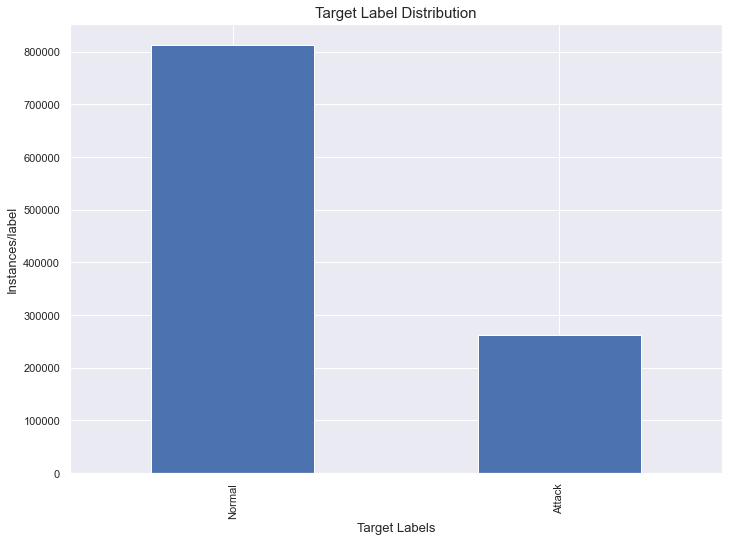

In [150]:
data['label'].value_counts().plot(kind='bar')
plt.title("Target Label Distribution", fontsize=15)
plt.xlabel("Target Labels", fontsize=13)
plt.ylabel("Instances/label", fontsize=13)
plt.show()

In [153]:
data = data.drop(axis=1, columns=[''])

In [154]:
df_cat = data.select_dtypes(exclude=[np.number])
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074992 entries, 0 to 4898430
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   protocol_type  1074992 non-null  object
 1   service        1074992 non-null  object
 2   flag           1074992 non-null  object
 3   label          1074992 non-null  object
dtypes: object(4)
memory usage: 41.0+ MB


In [156]:
df_cat.describe(include='all')

,protocol_type,service,flag,label
count,1074992,1074992,1074992,1074992
unique,3,70,11,2
top,tcp,http,SF,Normal
freq,978540,580507,786840,812814


In [165]:
data_original = data.copy()

In [166]:
n_features = [2, 3, 2]
for feature, num in zip(df_cat.columns, n_features):
    #print(num)
    if data[feature].nunique()>num:
        where_condition = data[feature].isin(data[feature].value_counts().head(num).index)
        percent = where_condition.sum()/data.shape[0]
        print(f"Feature Name {feature}")
        print(f"Top {num} Features occupy {round(percent*100,2)}% of the data")
        #df[feature] = np.where(where_condition,
        #                      data[feature], "OTHER")

Feature Name protocol_type
Top 2 Features occupy 98.89% of the data
Feature Name service
Top 3 Features occupy 81.47% of the data
Feature Name flag
Top 2 Features occupy 92.13% of the data


In [167]:
n_features = [3, 4, 2]
for feature, num in zip(df_cat.columns, n_features):
    #print(num)
    if data[feature].nunique()>num:
        where_condition = data[feature].isin(data[feature].value_counts().head(num).index)
        percent = where_condition.sum()/data.shape[0]
        print(f"Feature Name {feature}")
        print(f"Top {num} Features occupy {round(percent*100,2)}% of the data")
        data[feature] = np.where(where_condition,
                              data[feature], "OTHER")

Feature Name service
Top 4 Features occupy 85.82% of the data
Feature Name flag
Top 2 Features occupy 92.13% of the data


In [168]:
data.select_dtypes(exclude=[np.number]).describe()

,protocol_type,service,flag,label
count,1074992,1074992,1074992,1074992
unique,3,5,3,2
top,tcp,http,SF,Normal
freq,978540,580507,786840,812814


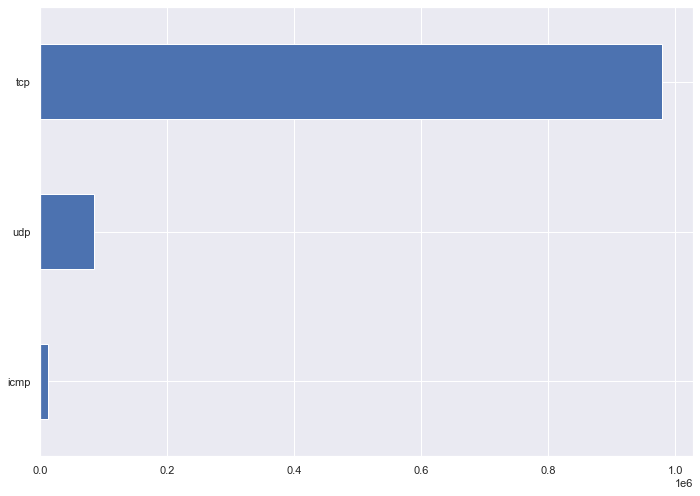

In [170]:
data.select_dtypes(exclude=[np.number])['protocol_type'].value_counts().plot(kind='barh').invert_yaxis()

In [173]:
def save_data(df, des=''):
    path = r"kddcup\preprocessing"
    os.makedirs(path, exist_ok=True)
    if not os.listdir(path):
        version = "v1"
    else:
        final = os.listdir(path)[-1]
        version = f"v{int(final[-5])+1}"
    #print(os.listdir(path))
    file = os.path.join(path, f"{des}_{version}")
    file += ".csv"
    #data = np.array(df)
    df.to_csv(file, index=False)
    print(f"Version {version} Data is Saved Successfully in Path: {file}")

In [174]:
save_data(data)

Version v1 Data is Saved Successfully in Path: kddcup\preprocessing\_v1.csv


# OneHotEncoder

In [103]:
os.getcwd()

'C:\\Users\\Dell\\Desktop\\Network Intrusion Detection'

In [104]:
data = pd.read_csv('kddcup\preprocessing\_v1.csv')

In [105]:
X_train = data.drop(columns=['label'], axis=1)
y_train_ = data['label']

In [106]:
old_features = X_train.columns

In [107]:
len(old_features)

41

In [108]:
X_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [109]:
transformers = [('encoder', OneHotEncoder(sparse=False), [1,2,3])]
ct = ColumnTransformer(transformers=transformers, remainder='passthrough')

In [110]:
X_train.shape

(1074992, 41)

In [111]:
X_train = np.array(ct.fit_transform(X_train))
X_train.shape

(1074992, 49)

In [112]:
new_features = [f for f in old_features if f not in ['flag', 'service', 'protocol_type']]
len(new_features)

38

In [113]:
for label in list(data['flag'].value_counts().index):
    new_features.insert(0, f"flag={label}")
    
for label in list(data['service'].value_counts().index):
    new_features.insert(0, f"service={label}")
    
for label in list(data['protocol_type'].value_counts().index):
    new_features.insert(0, f"protocol_type={label}")
    
len(new_features)

49

In [114]:
new_features

['protocol_type=icmp',
 'protocol_type=udp',
 'protocol_type=tcp',
 'service=domain_u',
 'service=smtp',
 'service=OTHER',
 'service=private',
 'service=http',
 'flag=OTHER',
 'flag=S0',
 'flag=SF',
 'duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [115]:
df_one_hot = pd.DataFrame(X_train, columns=new_features)
df_one_hot.iloc[0].values

array([0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 2.1500e+02, 4.5076e+04, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [116]:
X_train[0]

array([0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 2.1500e+02, 4.5076e+04, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [199]:
save_data(df_one_hot,des='one_hot')

Version v2 Data is Saved Successfully in Path: kddcup\preprocessing\one_hot_v2.csv


# Train a Base Line Model with all Features

In [117]:
def define_models():
    RS = 32
    estimators = {
        "DecisionTree": DecisionTreeClassifier(random_state=RS),
        "RandomForest" : RandomForestClassifier(random_state=RS, n_jobs=-1),
        "ExtraTrees": ExtraTreesClassifier(random_state=RS,n_jobs=-1),
        "GradientBoosting": GradientBoostingClassifier(random_state=RS),
        "XGBoost": XGBClassifier(random_state=RS, use_label_encoder=False,
                                 n_jobs=-1),
        "AdaBoost": AdaBoostClassifier(random_state=RS),
        "SVC": Pipeline([('scaler', StandardScaler()),
                         ('svc', LinearSVC(random_state=RS))]),
        "LogisticRegression": Pipeline([('scaler', StandardScaler()),
                                        ('lg', LogisticRegression(random_state=RS))]),
        "Lasso": Pipeline([('scaler', StandardScaler()),
                                        ('lasso', SGDClassifier(random_state=RS, penalty='l2'))]),
        "Ridge": Pipeline([('scaler', StandardScaler()),
                                        ('ridge', SGDClassifier(random_state=RS, penalty='l1'))]),
        "ElasticNet": Pipeline([('scaler', StandardScaler()),
                                        ('ElasticNet', SGDClassifier(random_state=RS, penalty="elasticnet"))])
        
    }
    return estimators

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [120]:
y_train_.unique()

array(['Normal', 'Attack'], dtype=object)

In [121]:
y_train_[y_train_ == 'Attack'] = 1
y_train_[y_train_ == 'Normal'] = 0

C:\Users\Dell\AppData\Local\Temp\ipykernel_15296\1906299040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_[y_train_ == 'Attack'] = 1
C:\Users\Dell\AppData\Local\Temp\ipykernel_15296\1906299040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_[y_train_ == 'Normal'] = 0


In [123]:
y_train_.unique()

array([0, 1], dtype=object)

In [125]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train_, random_state=32,
                                                      stratify=y_train_)

In [80]:
models = define_models()
results = []
for model_name, model in models.items():
    result = []
    model.fit(X_train, list(y_train.values))
    #print(40*"_")
    y_pred_train = model.predict(X_train)
    y_pred_valid = model.predict(X_valid)
    precision_train = precision_score(list(y_train.values), y_pred_train)
    precision_valid = precision_score(list(y_valid.values), y_pred_valid)
    recal_train = recall_score(list(y_train.values), y_pred_train)
    recal_valid = recall_score(list(y_valid.values), y_pred_valid)
    f1_train = f1_score(list(y_train.values), y_pred_train)
    f1_valid = f1_score(list(y_valid.values), y_pred_valid)
    acc_train = accuracy_score(list(y_train.values), y_pred_train)
    acc_valid = accuracy_score(list(y_valid.values), y_pred_valid)
    result.extend([model_name ,acc_train, acc_valid, precision_train, precision_valid, recal_train,
                  recal_valid, f1_train, f1_valid])
    print(result)
    results.append(result)

['DecisionTree', 0.9999913177648454, 0.9997581377349785, 1.0, 0.9994508176714669, 0.999964400685541, 0.9995575558776413, 0.9999822000259371, 0.99950418392488]
['RandomForest', 0.9999913177648454, 0.9998548826409871, 0.9999898286121142, 0.9999236827645155, 0.9999745719182437, 0.9994812724082691, 0.9999822002069862, 0.9997024286400988]
['ExtraTrees', 0.9999913177648454, 0.9998102311459062, 1.0, 0.9997558221164118, 0.999964400685541, 0.9994660157143946, 0.9999822000259371, 0.9996108979102929]
['GradientBoosting', 0.9994629417397215, 0.9995088335541101, 0.9996383860814293, 0.9996791688946605, 0.9981590068808389, 0.9983065069799375, 0.998898148737197, 0.9989923664122138]
[16:22:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
['XGBoost', 0.9

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 0.9954269427121318, 0.9955088037864468, 0.9937256266696691, 0.9936318438497422, 0.9874842981595154, 0.9879166984514456, 0.9905951315074574, 0.9907660293926389]


C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['LogisticRegression', 0.9954095782418225, 0.995601827734532, 0.9939425902979037, 0.9942407814107782, 0.9871944180274929, 0.987687848043329, 0.9905570113106643, 0.990953481608474]
['Lasso', 0.996097955457653, 0.9962381115394348, 0.9960009638702466, 0.996094831032256, 0.9879674317128865, 0.9884506827370508, 0.9919679330065359, 0.9922580348733028]
['Ridge', 0.995921830115945, 0.996022295979877, 0.9921147610248265, 0.992378654122247, 0.9911561131651351, 0.9913036844915707, 0.9916352054055705, 0.9918408780405894]
['ElasticNet', 0.9962914452696702, 0.9965022995519967, 0.9951873161999745, 0.9957792955260533, 0.9895795720962403, 0.9898542985734992, 0.9923755221109859, 0.9928079571537873]


In [81]:
results = pd.DataFrame(data=results,
                       columns=["Model", "Acc_train" ,"Acc_valid",
                                "Precision_train", "Precision_valid","Recall_train",
                                "Recall_valid", "F1-score_train", "F1-score_valid"])

In [82]:
results

,Model,Acc_train,Acc_valid,Precision_train,Precision_valid,Recall_train,Recall_valid,F1-score_train,F1-score_valid
0,DecisionTree,0.999991,0.999758,1.000000,0.999451,0.999964,0.999558,0.999982,0.999504
1,RandomForest,0.999991,0.999855,0.999990,0.999924,0.999975,0.999481,0.999982,0.999702
2,ExtraTrees,0.999991,0.999810,1.000000,0.999756,0.999964,0.999466,0.999982,0.999611
3,GradientBoosting,0.999463,0.999509,0.999638,0.999679,0.998159,0.998307,0.998898,0.998992
4,XGBoost,0.999988,0.999888,0.999985,0.999924,0.999964,0.999619,0.999975,0.999771
5,AdaBoost,0.997760,0.997793,0.997462,0.997290,0.993343,0.993653,0.995398,0.995468
6,SVC,0.995427,0.995509,0.993726,0.993632,0.987484,0.987917,0.990595,0.990766
7,LogisticRegression,0.995410,0.995602,0.993943,0.994241,0.987194,0.987688,0.990557,0.990953
8,Lasso,0.996098,0.996238,0.996001,0.996095,0.987967,0.988451,0.991968,0.992258
9,Ridge,0.995922,0.996022,0.992115,0.992379,0.991156,0.991304,0.991635,0.991841


In [83]:
results.style.background_gradient(cmap='coolwarm')

,Model,Acc_train,Acc_valid,Precision_train,Precision_valid,Recall_train,Recall_valid,F1-score_train,F1-score_valid
0,DecisionTree,0.999991,0.999758,1.000000,0.999451,0.999964,0.999558,0.999982,0.999504
1,RandomForest,0.999991,0.999855,0.999990,0.999924,0.999975,0.999481,0.999982,0.999702
2,ExtraTrees,0.999991,0.999810,1.000000,0.999756,0.999964,0.999466,0.999982,0.999611
3,GradientBoosting,0.999463,0.999509,0.999638,0.999679,0.998159,0.998307,0.998898,0.998992
4,XGBoost,0.999988,0.999888,0.999985,0.999924,0.999964,0.999619,0.999975,0.999771
5,AdaBoost,0.997760,0.997793,0.997462,0.997290,0.993343,0.993653,0.995398,0.995468
6,SVC,0.995427,0.995509,0.993726,0.993632,0.987484,0.987917,0.990595,0.990766
7,LogisticRegression,0.995410,0.995602,0.993943,0.994241,0.987194,0.987688,0.990557,0.990953
8,Lasso,0.996098,0.996238,0.996001,0.996095,0.987967,0.988451,0.991968,0.992258
9,Ridge,0.995922,0.996022,0.992115,0.992379,0.991156,0.991304,0.991635,0.991841


In [85]:
results.to_csv('kddcup\\results\\all_features.csv', index=False)

# Feature Selection with Orange

In [149]:
X_train = pd.read_csv('kddcup/preprocessing/one_hot_v2.csv')

In [150]:
X_train_ = X_train.copy()

In [151]:
X_train.head()

,protocol_type=icmp,protocol_type=udp,protocol_type=tcp,service=domain_u,service=smtp,service=OTHER,service=private,service=http,flag=OTHER,flag=S0,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0


In [143]:
rank = pd.read_csv('kddcup\Feature Scores.csv')
rank = rank.iloc[2:,:]
rank.index = rank.Feature
rank = rank.drop(columns=["Feature"], axis=1).astype('float64')
rank.head(10)

,Info. gain,Gain ratio,χ²,ReliefF
Feature,,,,
duration,0.023905,0.044353,43248.009189,0.0038
protocol_type=icmp,0.005353,0.060931,9536.671847,0.0000
protocol_type=tcp,0.008409,0.019306,960.404776,0.0000
protocol_type=udp,0.020374,0.051269,20186.857387,0.0000
service=OTHER,0.019971,0.033904,28282.340226,0.1740
service=domain_u,0.017885,0.069328,15049.243399,0.0200
service=http,0.318602,0.320082,179962.182996,0.0240
service=private,0.440454,0.637750,568684.256737,0.2040
service=smtp,0.031381,0.072012,28147.010045,0.0340


In [144]:
X_train.columns

Index(['protocol_type=icmp', 'protocol_type=udp', 'protocol_type=tcp',
       'service=domain_u', 'service=smtp', 'service=OTHER', 'service=private',
       'service=http', 'flag=OTHER', 'flag=S0', 'flag=SF', 'duration',
       'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='o

In [145]:
for col in X_train.columns:
    print(col in rank.index)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [146]:
list(rank.columns)

['Info. gain', 'Gain ratio', 'χ²', 'ReliefF']

In [147]:
min_score = rank['Info. gain'].quantile(0.10)
max_score = rank['Info. gain'].quantile(0.90)
ths = np.round(np.linspace(min_score, max_score, num=10), 10)
ths

array([2.87861000e-05, 5.80680039e-02, 1.16107222e-01, 1.74146439e-01,
       2.32185657e-01, 2.90224875e-01, 3.48264093e-01, 4.06303311e-01,
       4.64342528e-01, 5.22381746e-01])

In [156]:
models = define_models()
results = []
for scoring_method in list(rank.columns):
    print(40*"_" + scoring_method + 40*"_")
    min_score = rank[scoring_method].quantile(0.10)
    max_score = rank[scoring_method].quantile(0.90)
    ths = np.round(np.linspace(min_score, max_score, num=10), 5)
    for th in ths:
        new_fs = rank.index[rank[scoring_method] >= th]
        X_train_sel = X_train_[new_fs]
        num_features = len(X_train_sel.columns)
        X_train, X_valid, y_train, y_valid = train_test_split(X_train_sel, y_train_, random_state=32,
                                                          stratify=y_train_)
        for model_name, model in models.items():
            result = []
            model.fit(X_train, list(y_train.values))
            #print(40*"_")
            y_pred_train = model.predict(X_train)
            y_pred_valid = model.predict(X_valid)
            precision_train = precision_score(list(y_train.values), y_pred_train)
            precision_valid = precision_score(list(y_valid.values), y_pred_valid)
            recal_train = recall_score(list(y_train.values), y_pred_train)
            recal_valid = recall_score(list(y_valid.values), y_pred_valid)
            f1_train = f1_score(list(y_train.values), y_pred_train)
            f1_valid = f1_score(list(y_valid.values), y_pred_valid)
            acc_train = accuracy_score(list(y_train.values), y_pred_train)
            acc_valid = accuracy_score(list(y_valid.values), y_pred_valid)
            result.extend([model_name,num_features,scoring_method,acc_train, acc_valid, precision_train, precision_valid, recal_train,
                          recal_valid, f1_train, f1_valid])
            print(result)
            results.append(result)

________________________________________Info. gain________________________________________
['DecisionTree', 44, 'Info. gain', 0.9999913177648454, 0.9997618586929019, 1.0, 0.9994051160023796, 0.999964400685541, 0.9996185826531391, 0.9999822000259371, 0.9995118379301929]
['RandomForest', 44, 'Info. gain', 0.9999913177648454, 0.9998586035989105, 0.9999898286121142, 0.9999084235107374, 0.9999745719182437, 0.999511785796018, 0.9999822002069862, 0.9997100653116036]
['ExtraTrees', 44, 'Info. gain', 0.9999913177648454, 0.9997879053983657, 1.0, 0.9997405451604041, 0.999964400685541, 0.9993897322450225, 0.9999822000259371, 0.9995651079219025]
['GradientBoosting', 44, 'Info. gain', 0.9994753449327995, 0.9994716239748761, 0.9996231373307938, 0.9996943905383311, 0.9982251198934055, 0.9981386833473186, 0.9989236394726598, 0.9989159312303417]
[17:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric u

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 44, 'Info. gain', 0.9955336101726029, 0.9956874097667704, 0.9945835425783772, 0.9947745366243507, 0.9870621920023597, 0.9875047677168357, 0.9908085936203829, 0.9911263216727534]


C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['LogisticRegression', 44, 'Info. gain', 0.9953971750487446, 0.9955869439028383, 0.993977692882821, 0.994301162808559, 0.9871079625495212, 0.9875657944923335, 0.9905309167736223, 0.9909220335869449]
['Lasso', 44, 'Info. gain', 0.9957382628583903, 0.995903225326328, 0.9936933023279585, 0.9939297320497884, 0.9888014727944954, 0.9892440308185216, 0.9912413522373299, 0.9915813459141618]
['Ridge', 44, 'Info. gain', 0.9959838460813352, 0.9960743893908047, 0.9922320015067677, 0.9924855667898708, 0.9912934248066194, 0.9914104813486917, 0.9917624910959602, 0.9919477327715827]
['ElasticNet', 44, 'Info. gain', 0.9957705111603932, 0.995966481611026, 0.9934671903810891, 0.9938556302958798, 0.9891625515554358, 0.9895796780837592, 0.9913101979032348, 0.9917130450736958]
['DecisionTree', 22, 'Info. gain', 0.9999913177648454, 0.9996465089972763, 1.0, 0.9992219917012448, 0.999964400685541, 0.9993287054695248, 0.9999822000259371, 0.9992753457363632]
['RandomForest', 22, 'Info. gain', 0.9999913177648454, 

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 22, 'Info. gain', 0.9923918813659388, 0.9924390134996354, 0.9933699024650495, 0.9934428267321348, 0.9753144182309175, 0.9754367228621558, 0.9842593638052616, 0.9843574386845468]


C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['LogisticRegression', 22, 'Info. gain', 0.9927590158810484, 0.9928259931236697, 0.9933137174800006, 0.9933309552243436, 0.976885873683461, 0.9771454725760927, 0.985031306568482, 0.9851717401670487]
['Lasso', 22, 'Info. gain', 0.9932551436041694, 0.9932762290324021, 0.9923518656812504, 0.9921549247922908, 0.9798965585634151, 0.9801815546571058, 0.9860848827271377, 0.9861318966377332]
['Ridge', 22, 'Info. gain', 0.9926945192770427, 0.9927106434280442, 0.9904604197415313, 0.990254433307633, 0.9794795380226107, 0.9797543672286215, 0.9849393739484411, 0.9849764178074312]
['ElasticNet', 22, 'Info. gain', 0.9931745228491623, 0.9932204146635509, 0.991933657291109, 0.9917581145529472, 0.9799830140413868, 0.9803493782897246, 0.9859221227075163, 0.9860207463785907]
['DecisionTree', 21, 'Info. gain', 0.9999900774455376, 0.9996427880393528, 1.0, 0.9991915185721912, 0.9999593150691898, 0.9993439621633992, 0.9999796571207705, 0.9992677345537757]
['RandomForest', 21, 'Info. gain', 0.9999900774455376,

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 21, 'Info. gain', 0.9924042845590169, 0.9924352925417119, 0.9934009126838188, 0.9934427248430605, 0.9753347606963226, 0.9754214661682813, 0.9842849444430187, 0.9843496200953034]


C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['LogisticRegression', 21, 'Info. gain', 0.9927602562003562, 0.9928259931236697, 0.9933137520555171, 0.9933156531583927, 0.9768909592998123, 0.9771607292699672, 0.9850339089522198, 0.985171968252015]
['Lasso', 21, 'Info. gain', 0.9932042905125495, 0.9932762290324021, 0.9920866198488375, 0.9920181559933304, 0.9799525003432791, 0.9803188649019757, 0.9859822289765415, 0.9861338121657189]
['Ridge', 21, 'Info. gain', 0.992617619479959, 0.992617619479959, 0.9902304081118464, 0.9899332480305857, 0.979393082544639, 0.9796933404531238, 0.9847819305880127, 0.984786676072754]
['ElasticNet', 21, 'Info. gain', 0.9932117324283963, 0.9932613452007085, 0.9920564644831811, 0.9918657776131382, 0.9800135277394944, 0.9804104050652224, 0.9859982245144917, 0.9861048237975033]
['DecisionTree', 20, 'Info. gain', 0.9999900774455376, 0.9996204622918125, 0.999994914228463, 0.9991762139402908, 0.999964400685541, 0.999267678694027, 0.9999796572242282, 0.9992219442240801]
['RandomForest', 20, 'Info. gain', 0.999990

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 20, 'Info. gain', 0.9915149756153224, 0.9915608674297111, 0.993053318508204, 0.9930188708646939, 0.9720087676025896, 0.9722328171485239, 0.9824183562538067, 0.9825159191476897]


C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['LogisticRegression', 20, 'Info. gain', 0.9922393220910791, 0.9922864542247756, 0.9920395335373419, 0.9921225654385312, 0.976011147671042, 0.9761232740865055, 0.9839600706505439, 0.9840578929963932]
['Lasso', 20, 'Info. gain', 0.9924551376506368, 0.9924427344575587, 0.9906934344162667, 0.9905010502903744, 0.9782539044819537, 0.9783965214737966, 0.9844343738565036, 0.9844115773396065]
['Ridge', 20, 'Info. gain', 0.9920173049349824, 0.9920036614225967, 0.9898373879047918, 0.9896502718734552, 0.9773028942242655, 0.977435349759707, 0.9835302065633509, 0.983504885593448]
['ElasticNet', 20, 'Info. gain', 0.9924142071134793, 0.9923757572149374, 0.9903180477560621, 0.9899836404605364, 0.978462414752356, 0.9786406285757876, 0.9843545350360183, 0.9842794558804348]
['DecisionTree', 19, 'Info. gain', 0.9999789145717674, 0.9996241832497358, 0.9999949139956668, 0.9993133335367901, 0.9999186301383797, 0.9991456251430315, 0.9999567706121536, 0.9992294723029623]
['RandomForest', 19, 'Info. gain', 0.99

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 19, 'Info. gain', 0.9904768283546916, 0.9906306279488591, 0.9965365553704414, 0.9966901508345548, 0.9643040588304099, 0.9647875505377984, 0.980155386579686, 0.9804794095757876]
['LogisticRegression', 19, 'Info. gain', 0.9895850387723816, 0.9896780627204668, 0.9918630781290828, 0.991542810605942, 0.965214384157288, 0.9659165458845068, 0.9783572991600147, 0.9785619339083125]
['Lasso', 19, 'Info. gain', 0.9911317169492114, 0.9913524937860003, 0.9974273218420375, 0.9976855860820278, 0.9661297951005172, 0.9667861774353498, 0.9815291297249261, 0.9819928715326205]
['Ridge', 19, 'Info. gain', 0.9905611700676222, 0.9907534195603316, 0.9948634709532163, 0.9950075357950263, 0.9662874492074067, 0.9669387443740941, 0.9803672688058863, 0.9807723555218544]
['ElasticNet', 19, 'Info. gain', 0.9910213285308169, 0.9912110973849108, 0.9976823141121318, 0.9979195233817202, 0.9654279800440414, 0.9659775726600046, 0.9812901741753229, 0.9816887869015133]
['DecisionTree', 17, 'Info. gain', 0.9999789145

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 17, 'Info. gain', 0.9897239545348554, 0.9897227142155477, 0.9962167516755891, 0.9960651696401763, 0.9615171410699119, 0.9616599282935387, 0.9785594319090516, 0.9785602285252977]
['LogisticRegression', 17, 'Info. gain', 0.9894882938663729, 0.9894138747079048, 0.9930765199161425, 0.9926766406839326, 0.963617500622988, 0.9637043252727134, 0.9781252500432333, 0.9779759554719494]
['Lasso', 17, 'Info. gain', 0.9906827213597869, 0.990775745307872, 0.9973648637986987, 0.9973502413173087, 0.9643447437612201, 0.9647417804561752, 0.9805769011986886, 0.9807750471123795]
['Ridge', 17, 'Info. gain', 0.9901903145945893, 0.9903031836515993, 0.9950579199194157, 0.995013606405235, 0.9645685108806762, 0.9650774277214128, 0.9795760262988681, 0.9798169116622005]
['ElasticNet', 17, 'Info. gain', 0.9906070618820109, 0.9907422566865614, 0.9973221519586696, 0.9975225260765965, 0.9640752060946026, 0.9644366465786864, 0.9804169004760661, 0.9807006112507369]
['DecisionTree', 16, 'Info. gain', 0.9999789145

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 16, 'Info. gain', 0.9897475206017037, 0.989726435173471, 0.996264193692863, 0.995971182102569, 0.9615679972334247, 0.9617667251506599, 0.9786086569466226, 0.9785701534473257]
['LogisticRegression', 16, 'Info. gain', 0.9894957357822197, 0.989425037581675, 0.9930353942417541, 0.9926150558584604, 0.9636886992519058, 0.9638111221298344, 0.9781419777780647, 0.9780010527293558]
['Lasso', 16, 'Info. gain', 0.9907583808375628, 0.9908724902138807, 0.9975436049569736, 0.9976180711108307, 0.9644820554027045, 0.964879090701045, 0.9807342746846145, 0.9809755000426558]
['Ridge', 16, 'Info. gain', 0.9902523305599794, 0.9904148123893015, 0.9954490100153275, 0.9956237701692248, 0.9644413704718944, 0.9649401174765428, 0.979699902619459, 0.9800418377624546]
['ElasticNet', 16, 'Info. gain', 0.9907596211568707, 0.9908985369193445, 0.9975802591226861, 0.9977596516416074, 0.9644515417045969, 0.9648485773132962, 0.9807362128170121, 0.9810281707619757]
['DecisionTree', 16, 'Info. gain', 0.9999789145717

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 16, 'Info. gain', 0.9897475206017037, 0.989726435173471, 0.996264193692863, 0.995971182102569, 0.9615679972334247, 0.9617667251506599, 0.9786086569466226, 0.9785701534473257]
['LogisticRegression', 16, 'Info. gain', 0.9894957357822197, 0.989425037581675, 0.9930353942417541, 0.9926150558584604, 0.9636886992519058, 0.9638111221298344, 0.9781419777780647, 0.9780010527293558]
['Lasso', 16, 'Info. gain', 0.9907583808375628, 0.9908724902138807, 0.9975436049569736, 0.9976180711108307, 0.9644820554027045, 0.964879090701045, 0.9807342746846145, 0.9809755000426558]
['Ridge', 16, 'Info. gain', 0.9902523305599794, 0.9904148123893015, 0.9954490100153275, 0.9956237701692248, 0.9644413704718944, 0.9649401174765428, 0.979699902619459, 0.9800418377624546]
['ElasticNet', 16, 'Info. gain', 0.9907596211568707, 0.9908985369193445, 0.9975802591226861, 0.9977596516416074, 0.9644515417045969, 0.9648485773132962, 0.9807362128170121, 0.9810281707619757]
['DecisionTree', 12, 'Info. gain', 0.9999268211608

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 12, 'Info. gain', 0.9870299809983082, 0.9871031598374685, 0.9959720387025276, 0.9963381678046597, 0.9506644357762939, 0.9506140819284461, 0.9727909742116616, 0.9729392108180697]
['LogisticRegression', 12, 'Info. gain', 0.9873884332782632, 0.9874417670084986, 0.99690872751499, 0.9971213817367663, 0.9512391104239878, 0.9512548630711725, 0.9735386120783431, 0.9736482529767714]
['Lasso', 12, 'Info. gain', 0.986817886396674, 0.986760831708515, 0.997363509473718, 0.9973203254119799, 0.9484572782798412, 0.9482645510717828, 0.9722957896273434, 0.9721739946506499]
['Ridge', 12, 'Info. gain', 0.9860178804431413, 0.9859161742599015, 0.9944832148878503, 0.9943647540983607, 0.9479283741793086, 0.9476237699290564, 0.9706478918713434, 0.9704317665164168]
['ElasticNet', 12, 'Info. gain', 0.9869543215205322, 0.9869915310997663, 0.9972481231130941, 0.9974186721392955, 0.9491285796382093, 0.9491189259287512, 0.9725935306348983, 0.9726695644016385]
['DecisionTree', 5, 'Info. gain', 0.9953822912170

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 5, 'Info. gain', 0.9850343072320539, 0.9851012844746752, 0.9947938169203631, 0.9949174078780177, 0.9435750865826183, 0.9437333129910749, 0.9685077595251891, 0.9686496813291784]
['LogisticRegression', 5, 'Info. gain', 0.9857512117919637, 0.9857971036063524, 0.9952122395485061, 0.9952980068684405, 0.9461280659909578, 0.9462354107864825, 0.9700496391774079, 0.9701468023369493]
['Lasso', 5, 'Info. gain', 0.9846969403803315, 0.9847068629347939, 0.9942130188304827, 0.994255740237172, 0.9427410455010095, 0.9427416278892364, 0.9677931326125203, 0.9678136795777407]
['Ridge', 5, 'Info. gain', 0.9847403515561046, 0.9847701192194919, 0.9942300061131906, 0.9942891155368231, 0.9429037852242502, 0.9429704782973529, 0.9678869269018441, 0.9679500732144675]
['ElasticNet', 5, 'Info. gain', 0.9847155451699485, 0.9847403515561046, 0.9940862982264256, 0.9941452744000515, 0.9429393845387092, 0.9429857349912274, 0.96783757754816, 0.9678899441734461]
________________________________________Gain ratio__

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 44, 'Gain ratio', 0.9954864780389063, 0.9956055486924554, 0.9949884071649876, 0.9950772260168605, 0.9864620892729095, 0.9868639865741093, 0.9907069035525217, 0.9909535883078385]


C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['LogisticRegression', 44, 'Gain ratio', 0.995513765063678, 0.9957060145563874, 0.9948569904933803, 0.9950640444082235, 0.9867061988577706, 0.9872911740025936, 0.9907648312928471, 0.9911623703839849]
['Lasso', 44, 'Gain ratio', 0.9962009019602006, 0.9963385774033667, 0.9960636782056933, 0.9962794988085172, 0.9883285104738269, 0.9886795331451674, 0.9921810184842459, 0.9924649666896393]
['Ridge', 44, 'Gain ratio', 0.9956154712469178, 0.9957618289252386, 0.9948845172070899, 0.9952936110000308, 0.9870977913168186, 0.9872911740025936, 0.9909758581869516, 0.991276242120662]
['ElasticNet', 44, 'Gain ratio', 0.9962902049503625, 0.9964316013514519, 0.9968848790902, 0.9971366113488715, 0.9878758906185635, 0.9882065756350599, 0.9923599385934215, 0.9926515099269749]
['DecisionTree', 23, 'Gain ratio', 0.9999913177648454, 0.9996204622918125, 1.0, 0.9991153007214875, 0.999964400685541, 0.9993287054695248, 0.9999822000259371, 0.9992219917012448]
['RandomForest', 23, 'Gain ratio', 0.9999913177648454, 0

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 23, 'Gain ratio', 0.9925134326581035, 0.9925990146903418, 0.9935112349367954, 0.993600497048773, 0.975675496991858, 0.9759401937600122, 0.9845125931399717, 0.9846911679815278]


C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['LogisticRegression', 23, 'Gain ratio', 0.9929301799455251, 0.9930269248515338, 0.9934306757979067, 0.9934588855304968, 0.9774758051802088, 0.9778472804943169, 0.9853886616014028, 0.9855912655697371]
['Lasso', 23, 'Gain ratio', 0.9933667723418717, 0.9934734398023427, 0.9925684061986599, 0.9926022023506155, 0.9801406681482763, 0.9805477153100923, 0.9863153908353036, 0.9865381368290175]
['Ridge', 23, 'Gain ratio', 0.9927788609899733, 0.9927850625865122, 0.9903528383830597, 0.9900761241409067, 0.9799372434942253, 0.9802425814326036, 0.98511751082572, 0.9851348139743482]
['ElasticNet', 23, 'Gain ratio', 0.9932873919061723, 0.9933952996859512, 0.9926979464584783, 0.9925845821103043, 0.9796829626766616, 0.9802425814326036, 0.9861475141289213, 0.9863749760122817]
['DecisionTree', 19, 'Gain ratio', 0.9999789145717674, 0.9996204622918125, 0.9999949139956668, 0.9991000747395555, 0.9999186301383797, 0.9993439621633992, 0.9999567706121536, 0.9992220035696308]
['RandomForest', 19, 'Gain ratio', 0.

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 19, 'Gain ratio', 0.990361478659066, 0.9903255093991398, 0.9968117680482338, 0.996638841110287, 0.963561558843124, 0.963582271721718, 0.9799046823564094, 0.9798318284774583]
['LogisticRegression', 19, 'Gain ratio', 0.9898603896587137, 0.9897524818789349, 0.993847153653449, 0.9933994436673949, 0.9643955999247329, 0.9643908764970631, 0.9788999042429906, 0.9786802502012758]
['Lasso', 19, 'Gain ratio', 0.9911763684442922, 0.9913562147439237, 0.9984482586305751, 0.9988322550102572, 0.9653211821006646, 0.9656876954763902, 0.9816053079313858, 0.9819803746654773]
['Ridge', 19, 'Gain ratio', 0.9906839616790947, 0.9908724902138807, 0.996148801091348, 0.9963652956540895, 0.9655347779874182, 0.9660996262110001, 0.9806029084016188, 0.9809990782267872]
['ElasticNet', 19, 'Gain ratio', 0.9910597784293589, 0.9912371440903747, 0.9986679373035471, 0.99913112164297, 0.9646295382768915, 0.964909604088794, 0.98135366976749, 0.9817222243781287]
['DecisionTree', 17, 'Gain ratio', 0.9999789145717674, 

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 17, 'Gain ratio', 0.9897239545348554, 0.9897227142155477, 0.9962167516755891, 0.9960651696401763, 0.9615171410699119, 0.9616599282935387, 0.9785594319090516, 0.9785602285252977]
['LogisticRegression', 17, 'Gain ratio', 0.9894882938663729, 0.9894138747079048, 0.9930765199161425, 0.9926766406839326, 0.963617500622988, 0.9637043252727134, 0.9781252500432333, 0.9779759554719494]
['Lasso', 17, 'Gain ratio', 0.9906827213597869, 0.990775745307872, 0.9973648637986987, 0.9973502413173087, 0.9643447437612201, 0.9647417804561752, 0.9805769011986886, 0.9807750471123795]
['Ridge', 17, 'Gain ratio', 0.9901903145945893, 0.9903031836515993, 0.9950579199194157, 0.995013606405235, 0.9645685108806762, 0.9650774277214128, 0.9795760262988681, 0.9798169116622005]
['ElasticNet', 17, 'Gain ratio', 0.9906070618820109, 0.9907422566865614, 0.9973221519586696, 0.9975225260765965, 0.9640752060946026, 0.9644366465786864, 0.9804169004760661, 0.9807006112507369]
['DecisionTree', 12, 'Gain ratio', 0.9909952818

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 12, 'Gain ratio', 0.9846733743134832, 0.9844947683331597, 0.9948175676401405, 0.9950477480965286, 0.9420646585262901, 0.9411091616446716, 0.9677227241738693, 0.9673271285979755]
['LogisticRegression', 12, 'Gain ratio', 0.9873723091272617, 0.9871701370800899, 0.9958671531759624, 0.9957527662903767, 0.9521748638326222, 0.9514532000915401, 0.973531025195053, 0.9730990684538205]
['Lasso', 12, 'Gain ratio', 0.9880854927292482, 0.9879478172860822, 0.9982948520517726, 0.9983363726525258, 0.9527749665620725, 0.9521702647036387, 0.9750039032006245, 0.9747069710055521]
['Ridge', 12, 'Gain ratio', 0.9881202216698667, 0.9880073526128567, 0.9983641411208031, 0.9984324514539813, 0.9528512508073416, 0.9523228316423831, 0.975076892652133, 0.9748326995306997]
['ElasticNet', 12, 'Gain ratio', 0.988117741031251, 0.9880147945287034, 0.9982897786302246, 0.9983368515320156, 0.9529122782035568, 0.9524448851933786, 0.9750733748256697, 0.9748510661555158]
['DecisionTree', 10, 'Gain ratio', 0.9895403872

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 10, 'Gain ratio', 0.9845716681302434, 0.9843756976796106, 0.9947355415408747, 0.9948694782356168, 0.9417239222307547, 0.9407887710733084, 0.9675041210908416, 0.9670736393077545]
['LogisticRegression', 10, 'Gain ratio', 0.9873549446569525, 0.9871478113325495, 0.9959143285773564, 0.9957523593567859, 0.9520578946565429, 0.9513616599282936, 0.9734924221348025, 0.9730509955683166]
['Lasso', 10, 'Gain ratio', 0.9843756976796106, 0.9841152306249721, 0.9952476291966718, 0.9951035842409748, 0.94042709006118, 0.9394919520939813, 0.9670610692013022, 0.9664984657882553]
['Ridge', 10, 'Gain ratio', 0.9842888753280644, 0.9841077887091253, 0.9950965616724439, 0.9951194285529591, 0.9402134941744265, 0.939446182012358, 0.9668768190031405, 0.9664817183710948]
['ElasticNet', 10, 'Gain ratio', 0.9843049994790659, 0.9841152306249721, 0.9951715265404553, 0.9951515935095998, 0.9402084085580752, 0.939446182012358, 0.9669095150180699, 0.9664968882680248]
['DecisionTree', 10, 'Gain ratio', 0.98954038727

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 10, 'Gain ratio', 0.9845716681302434, 0.9843756976796106, 0.9947355415408747, 0.9948694782356168, 0.9417239222307547, 0.9407887710733084, 0.9675041210908416, 0.9670736393077545]
['LogisticRegression', 10, 'Gain ratio', 0.9873549446569525, 0.9871478113325495, 0.9959143285773564, 0.9957523593567859, 0.9520578946565429, 0.9513616599282936, 0.9734924221348025, 0.9730509955683166]
['Lasso', 10, 'Gain ratio', 0.9843756976796106, 0.9841152306249721, 0.9952476291966718, 0.9951035842409748, 0.94042709006118, 0.9394919520939813, 0.9670610692013022, 0.9664984657882553]
['Ridge', 10, 'Gain ratio', 0.9842888753280644, 0.9841077887091253, 0.9950965616724439, 0.9951194285529591, 0.9402134941744265, 0.939446182012358, 0.9668768190031405, 0.9664817183710948]
['ElasticNet', 10, 'Gain ratio', 0.9843049994790659, 0.9841152306249721, 0.9951715265404553, 0.9951515935095998, 0.9402084085580752, 0.939446182012358, 0.9669095150180699, 0.9664968882680248]
['DecisionTree', 9, 'Gain ratio', 0.989433719816

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 9, 'Gain ratio', 0.9846646920783286, 0.9844910473752363, 0.9948014285330684, 0.9950636403232832, 0.942044316060885, 0.9410786482569228, 0.967704355367022, 0.9673185189831732]
['LogisticRegression', 9, 'Gain ratio', 0.9877195985334465, 0.9876538616101329, 0.9960788064269319, 0.9962834766241845, 0.9534004973732791, 0.9529330993973606, 0.9742724917563358, 0.9741262340335939]
['Lasso', 9, 'Gain ratio', 0.9842826737315254, 0.9840929048774316, 0.9951177499663572, 0.9951351176622705, 0.940167723627265, 0.9393698985429857, 0.9668626179368632, 0.9664487470274766]
['Ridge', 9, 'Gain ratio', 0.9842888753280644, 0.9841077887091253, 0.99508590251464, 0.9951034259857789, 0.940223665407129, 0.9394614387062323, 0.9668771654572792, 0.9664822444575241]
['ElasticNet', 9, 'Gain ratio', 0.9843049994790659, 0.9841226725408189, 0.9951395430201577, 0.9951517502181713, 0.9402389222561829, 0.9394766954001068, 0.9669105533735337, 0.9665131098781226]
['DecisionTree', 6, 'Gain ratio', 0.9886002252419863, 0

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 44, 'χ²', 0.9955336101726029, 0.9956874097667704, 0.9945835425783772, 0.9947745366243507, 0.9870621920023597, 0.9875047677168357, 0.9908085936203829, 0.9911263216727534]


C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['LogisticRegression', 44, 'χ²', 0.9953971750487446, 0.9955869439028383, 0.993977692882821, 0.994301162808559, 0.9871079625495212, 0.9875657944923335, 0.9905309167736223, 0.9909220335869449]
['Lasso', 44, 'χ²', 0.9957382628583903, 0.995903225326328, 0.9936933023279585, 0.9939297320497884, 0.9888014727944954, 0.9892440308185216, 0.9912413522373299, 0.9915813459141618]
['Ridge', 44, 'χ²', 0.9959838460813352, 0.9960743893908047, 0.9922320015067677, 0.9924855667898708, 0.9912934248066194, 0.9914104813486917, 0.9917624910959602, 0.9919477327715827]
['ElasticNet', 44, 'χ²', 0.9957705111603932, 0.995966481611026, 0.9934671903810891, 0.9938556302958798, 0.9891625515554358, 0.9895796780837592, 0.9913101979032348, 0.9917130450736958]
['DecisionTree', 25, 'χ²', 0.9999913177648454, 0.999635346123506, 1.0, 0.9992067245350948, 0.999964400685541, 0.9992981920817758, 0.9999822000259371, 0.9992524562152926]
['RandomForest', 25, 'χ²', 0.9999913177648454, 0.9997990682721359, 0.9999898286121142, 0.9998778

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 25, 'χ²', 0.9923794781728609, 0.9924315715837886, 0.9934615803080622, 0.9935039706590828, 0.9751720209730819, 0.9753451826989091, 0.9842318412097135, 0.9843408370030486]


C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['LogisticRegression', 25, 'χ²', 0.9928135899305918, 0.9928334350395166, 0.9933764561713745, 0.9933617681271811, 0.9770486134067018, 0.9771454725760927, 0.9851448848049144, 0.9851868943239502]
['Lasso', 25, 'χ²', 0.9933642917032561, 0.993439951181032, 0.9928830941276509, 0.9928295472106321, 0.9798151887017947, 0.9801815546571058, 0.9863058580211838, 0.986465010940079]
['Ridge', 25, 'χ²', 0.9926635112943476, 0.9927069224701207, 0.9907923992259233, 0.9906931518266426, 0.9790167469346448, 0.9792966664123884, 0.9848693752573996, 0.9849619445126442]
['ElasticNet', 25, 'χ²', 0.9932911128640958, 0.9933692529804873, 0.9925406964764063, 0.9925381204715042, 0.979855873632605, 0.9801815546571058, 0.9861574959117396, 0.9863211385234198]
['DecisionTree', 21, 'χ²', 0.9999900774455376, 0.9996427880393528, 1.0, 0.9991915185721912, 0.9999593150691898, 0.9993439621633992, 0.9999796571207705, 0.9992677345537757]
['RandomForest', 21, 'χ²', 0.9999900774455376, 0.9997730215666721, 0.9999898285603853, 0.9998

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 21, 'χ²', 0.9924042845590169, 0.9924352925417119, 0.9934009126838188, 0.9934427248430605, 0.9753347606963226, 0.9754214661682813, 0.9842849444430187, 0.9843496200953034]


C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['LogisticRegression', 21, 'χ²', 0.9927602562003562, 0.9928259931236697, 0.9933137520555171, 0.9933156531583927, 0.9768909592998123, 0.9771607292699672, 0.9850339089522198, 0.985171968252015]
['Lasso', 21, 'χ²', 0.9932042905125495, 0.9932762290324021, 0.9920866198488375, 0.9920181559933304, 0.9799525003432791, 0.9803188649019757, 0.9859822289765415, 0.9861338121657189]
['Ridge', 21, 'χ²', 0.992617619479959, 0.992617619479959, 0.9902304081118464, 0.9899332480305857, 0.979393082544639, 0.9796933404531238, 0.9847819305880127, 0.984786676072754]
['ElasticNet', 21, 'χ²', 0.9932117324283963, 0.9932613452007085, 0.9920564644831811, 0.9918657776131382, 0.9800135277394944, 0.9804104050652224, 0.9859982245144917, 0.9861048237975033]
['DecisionTree', 16, 'χ²', 0.9999900774455376, 0.9995609269650378, 0.999994914228463, 0.9991607794070525, 0.999964400685541, 0.9990388282859104, 0.9999796572242282, 0.9990998001251125]
['RandomForest', 16, 'χ²', 0.9999900774455376, 0.9997395329453614, 0.9999847429957

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 16, 'χ²', 0.99000922797565, 0.9899869022281096, 0.991446888356093, 0.9911082635329416, 0.9673808567229305, 0.9676252955984438, 0.9792660356814666, 0.9792260126450357]
['LogisticRegression', 16, 'χ²', 0.9905636507062379, 0.9905227201690803, 0.9913390206750989, 0.9909904292795461, 0.9697812676407317, 0.9699595697612328, 0.9804416565978561, 0.9803622233016446]
['Lasso', 16, 'χ²', 0.9905041153794633, 0.9904855105898462, 0.9894128920311812, 0.9888702617118376, 0.971459521036652, 0.9719276832710352, 0.9803540177265472, 0.9803257750044242]
['Ridge', 16, 'χ²', 0.9899484523295677, 0.9899087621117181, 0.9891901709956148, 0.9886913372843654, 0.9693795039489811, 0.9697154626592417, 0.9791846463650187, 0.9791114671267485]
['ElasticNet', 16, 'χ²', 0.9905165185725413, 0.9904817896319228, 0.9908013857652613, 0.9903162024567577, 0.970122003936267, 0.9704630406590892, 0.9803526551924391, 0.9802891135495007]
['DecisionTree', 13, 'χ²', 0.9999751936138439, 0.9996279042076592, 0.9999949139180632, 0.

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 13, 'χ²', 0.9878337079097643, 0.987892002917231, 0.9895345302854028, 0.9892859948158039, 0.9602711650638499, 0.9607597833549469, 0.9746832502690662, 0.9748142414860681]
['LogisticRegression', 13, 'χ²', 0.9892327880889656, 0.9892315477696578, 0.9911723200752627, 0.9909876020752025, 0.9644413704718944, 0.9646197269051796, 0.9776241548807489, 0.9776259026177848]
['Lasso', 13, 'χ²', 0.989594961326844, 0.9896036435619986, 0.9921360299500136, 0.9917404592116605, 0.9649855314214806, 0.9654130749866504, 0.9783724557536384, 0.9783996907614999]
['Ridge', 13, 'χ²', 0.9890182128487158, 0.9889748016729427, 0.9898216307302237, 0.9891205802357208, 0.9648939903271577, 0.9654130749866504, 0.9771988648361893, 0.9771230475837523]
['ElasticNet', 13, 'χ²', 0.9896185273936923, 0.9896036435619986, 0.9921985704350917, 0.991771288851272, 0.9650211307359395, 0.9653825615989016, 0.9784211611838712, 0.9783990227761199]
['DecisionTree', 12, 'χ²', 0.9999677516979971, 0.9996204622918125, 0.9999694841292042, 

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 12, 'χ²', 0.9880892136871716, 0.98817479571941, 0.9900126806468178, 0.9898521811527042, 0.9608560109442464, 0.9613700511099245, 0.9752164655784245, 0.9754032382898362]
['LogisticRegression', 12, 'χ²', 0.9895986822847674, 0.9896036435619986, 0.9920332470791187, 0.991540160736946, 0.96510250059756, 0.965611412007018, 0.9783825864593431, 0.9784040316596587]
['Lasso', 12, 'χ²', 0.9895900000496127, 0.9895962016461518, 0.9920329555434737, 0.9916169165922374, 0.965066901283101, 0.965504615149897, 0.978364151463829, 0.9783865681333292]
['Ridge', 12, 'χ²', 0.9889611581605569, 0.9889078244303213, 0.9892677129647487, 0.988521722834744, 0.9652092985409366, 0.9657334655580135, 0.9770904335828502, 0.9769947290841879]
['ElasticNet', 12, 'χ²', 0.9895875194109972, 0.9895962016461518, 0.9921666649236015, 0.9917710308939012, 0.9649245040252653, 0.9653520482111526, 0.9783559828497913, 0.9783832261256803]
['DecisionTree', 8, 'χ²', 0.9895093792946056, 0.9891906172325003, 0.9992465204633368, 0.998710

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 8, 'χ²', 0.973484453837796, 0.9734360813847917, 0.975376085671041, 0.9756963674865613, 0.9143633062609023, 0.913845449691052, 0.9438847561199686, 0.9437586166148029]
['LogisticRegression', 8, 'χ²', 0.9739247671920659, 0.9738714334618304, 0.9744164685541388, 0.9748316430020284, 0.9171654808704541, 0.9165306278129529, 0.9449245899406099, 0.944782574506566]
['Lasso', 8, 'χ²', 0.9731818159266922, 0.9731458466667658, 0.9743025480641542, 0.9746899313128683, 0.9141497103741488, 0.9136165992829354, 0.9432681055608906, 0.9431656205948827]
['Ridge', 8, 'χ²', 0.9731818159266922, 0.9731458466667658, 0.9743025480641542, 0.9746899313128683, 0.9141497103741488, 0.9136165992829354, 0.9432681055608906, 0.9431656205948827]
['ElasticNet', 8, 'χ²', 0.9731818159266922, 0.9731458466667658, 0.9743025480641542, 0.9746899313128683, 0.9141497103741488, 0.9136165992829354, 0.9432681055608906, 0.9431656205948827]
['DecisionTree', 8, 'χ²', 0.9895093792946056, 0.9891906172325003, 0.9992465204633368, 0.99871

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 8, 'χ²', 0.973484453837796, 0.9734360813847917, 0.975376085671041, 0.9756963674865613, 0.9143633062609023, 0.913845449691052, 0.9438847561199686, 0.9437586166148029]
['LogisticRegression', 8, 'χ²', 0.9739247671920659, 0.9738714334618304, 0.9744164685541388, 0.9748316430020284, 0.9171654808704541, 0.9165306278129529, 0.9449245899406099, 0.944782574506566]
['Lasso', 8, 'χ²', 0.9731818159266922, 0.9731458466667658, 0.9743025480641542, 0.9746899313128683, 0.9141497103741488, 0.9136165992829354, 0.9432681055608906, 0.9431656205948827]
['Ridge', 8, 'χ²', 0.9731818159266922, 0.9731458466667658, 0.9743025480641542, 0.9746899313128683, 0.9141497103741488, 0.9136165992829354, 0.9432681055608906, 0.9431656205948827]
['ElasticNet', 8, 'χ²', 0.9731818159266922, 0.9731458466667658, 0.9743025480641542, 0.9746899313128683, 0.9141497103741488, 0.9136165992829354, 0.9432681055608906, 0.9431656205948827]
['DecisionTree', 5, 'χ²', 0.9861940057848493, 0.9858231503118162, 0.9974577634754626, 0.99703

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 5, 'χ²', 0.9456504482513979, 0.9457707592242547, 0.99825886219579, 0.9984353914455028, 0.7785112366693281, 0.7788694789839042, 0.8747960603575622, 0.875089992800576]
['LogisticRegression', 5, 'χ²', 0.9466116957149449, 0.9469168142646643, 0.9967463372036611, 0.9970147517785488, 0.7836527948004658, 0.7846975360439393, 0.8774471283610645, 0.8782057849264078]
['Lasso', 5, 'χ²', 0.9450414514712667, 0.9451940107461265, 0.99850764830245, 0.9984697480969944, 0.7758158600031531, 0.7764741780456175, 0.8731869540828592, 0.873589261652806]
['Ridge', 5, 'χ²', 0.9450364901940356, 0.9451754059565094, 0.9985271881075349, 0.9984695979751604, 0.7757802606886942, 0.7763978945762453, 0.8731718765204549, 0.8735409228234001]
['ElasticNet', 5, 'χ²', 0.9450389708326512, 0.9451828478723563, 0.9985337339381681, 0.9984696580274285, 0.7757853463050455, 0.7764284079639941, 0.8731776005861444, 0.8735602588530134]
['DecisionTree', 5, 'χ²', 0.9861940057848493, 0.9858231503118162, 0.9974577634754626, 0.9970371

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 5, 'χ²', 0.9456504482513979, 0.9457707592242547, 0.99825886219579, 0.9984353914455028, 0.7785112366693281, 0.7788694789839042, 0.8747960603575622, 0.875089992800576]
['LogisticRegression', 5, 'χ²', 0.9466116957149449, 0.9469168142646643, 0.9967463372036611, 0.9970147517785488, 0.7836527948004658, 0.7846975360439393, 0.8774471283610645, 0.8782057849264078]
['Lasso', 5, 'χ²', 0.9450414514712667, 0.9451940107461265, 0.99850764830245, 0.9984697480969944, 0.7758158600031531, 0.7764741780456175, 0.8731869540828592, 0.873589261652806]
['Ridge', 5, 'χ²', 0.9450364901940356, 0.9451754059565094, 0.9985271881075349, 0.9984695979751604, 0.7757802606886942, 0.7763978945762453, 0.8731718765204549, 0.8735409228234001]
['ElasticNet', 5, 'χ²', 0.9450389708326512, 0.9451828478723563, 0.9985337339381681, 0.9984696580274285, 0.7757853463050455, 0.7764284079639941, 0.8731776005861444, 0.8735602588530134]
________________________________________ReliefF________________________________________
['Decis

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 49, 'ReliefF', 0.9954269427121318, 0.9955088037864468, 0.9937256266696691, 0.9936318438497422, 0.9874842981595154, 0.9879166984514456, 0.9905951315074574, 0.9907660293926389]


C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['LogisticRegression', 49, 'ReliefF', 0.9954095782418225, 0.9955981067766085, 0.993932473809792, 0.9942558746736292, 0.9872045892601954, 0.9876573346555801, 0.990557107683672, 0.9909456201446557]
['Lasso', 49, 'ReliefF', 0.996097955457653, 0.9962381115394348, 0.9960009638702466, 0.996094831032256, 0.9879674317128865, 0.9884506827370508, 0.9919679330065359, 0.9922580348733028]
['Ridge', 49, 'ReliefF', 0.995921830115945, 0.996022295979877, 0.9921147610248265, 0.992378654122247, 0.9911561131651351, 0.9913036844915707, 0.9916352054055705, 0.9918408780405894]
['ElasticNet', 49, 'ReliefF', 0.9962914452696702, 0.9965022995519967, 0.9951873161999745, 0.9957792955260533, 0.9895795720962403, 0.9898542985734992, 0.9923755221109859, 0.9928079571537873]
['DecisionTree', 20, 'ReliefF', 0.99944681758872, 0.9984074300087815, 0.9994043406764043, 0.9977678912687856, 0.998326832220431, 0.9956976123274086, 0.9988652958626549, 0.9967316767719964]
['RandomForest', 20, 'ReliefF', 0.99944681758872, 0.99879440

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 20, 'ReliefF', 0.9936495651440507, 0.9937971631416792, 0.995883026157025, 0.9961012736874806, 0.9780047092807412, 0.9783965214737966, 0.9868629020670402, 0.9871695208774294]
['LogisticRegression', 20, 'ReliefF', 0.9946331383551381, 0.9948315894443865, 0.9958794042412741, 0.9962561881188119, 0.9820579455127064, 0.9825005721260203, 0.988920383984104, 0.9893305680377923]
['Lasso', 20, 'ReliefF', 0.995394694410129, 0.9956464792296129, 0.9961270611955191, 0.9964984806182419, 0.9849465756002299, 0.9856129376764056, 0.9905052690259015, 0.9910258180312026]
['Ridge', 20, 'ReliefF', 0.9955881842221461, 0.9958213642520131, 0.996125066809193, 0.9965316315205327, 0.9857450173673798, 0.9862994889007553, 0.9909078593210418, 0.9913891593887298]
['ElasticNet', 20, 'ReliefF', 0.9953810508977431, 0.9956278744399958, 0.9960553992686803, 0.9964216306259062, 0.9849618324492837, 0.9856129376764056, 0.9904775542349824, 0.9909878124544598]
['DecisionTree', 16, 'ReliefF', 0.9990846443508417, 0.997655796

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 16, 'ReliefF', 0.9909022578772679, 0.9910473752362808, 0.9971687607681641, 0.9972749468378357, 0.965438151276744, 0.9659318025783813, 0.9810469523964559, 0.9813531736805394]
['LogisticRegression', 16, 'ReliefF', 0.9930232038936103, 0.9931497164630062, 0.9947983586852903, 0.9949190465831753, 0.9764993668407642, 0.9769013654741018, 0.985563930614476, 0.98582788696181]
['Lasso', 16, 'ReliefF', 0.9925245955318738, 0.9926697128908867, 0.9964370175127882, 0.9964702391178721, 0.9728275518351447, 0.9733923258829812, 0.9844907580151671, 0.9847960979223906]
['Ridge', 16, 'ReliefF', 0.9929276993069096, 0.9931162278416956, 0.9960509428373976, 0.9962138327542419, 0.9748668839920054, 0.9754824929437791, 0.9853450668750192, 0.9857391733345666]
['ElasticNet', 16, 'ReliefF', 0.9927875432251279, 0.9929264589876018, 0.9963686307969243, 0.9963965931426075, 0.9739769011305325, 0.9745213212296895, 0.9850455320473092, 0.9853375600650979]
['DecisionTree', 15, 'ReliefF', 0.9990846443508417, 0.997644633

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 15, 'ReliefF', 0.9913338889963832, 0.9915124949767068, 0.9972312823148158, 0.9973272121250236, 0.9671520039871232, 0.9677931192310626, 0.9819613512850633, 0.9823382294868718]
['LogisticRegression', 15, 'ReliefF', 0.9930157619777635, 0.9931832050843169, 0.9946546776749919, 0.9948890028118252, 0.9766112504004922, 0.9770691891067206, 0.9855503863238037, 0.9858985806213245]
['Lasso', 15, 'ReliefF', 0.9921301739919925, 0.9923162218881629, 0.9962446799632814, 0.996340776881216, 0.9713934080240855, 0.9720649935159051, 0.9836621081931503, 0.9840531920644359]
['Ridge', 15, 'ReliefF', 0.992177306125689, 0.992353431467397, 0.9965354232105774, 0.9966208816995713, 0.9713018669297625, 0.9719429399649097, 0.9837568602605804, 0.9841272293325712]
['ElasticNet', 15, 'ReliefF', 0.9922889348633912, 0.9924166877520949, 0.9963610201655788, 0.9964664863428133, 0.9719324833573205, 0.9723548706995194, 0.9839951601899882, 0.9842630343464294]
['DecisionTree', 10, 'ReliefF', 0.998297041590387, 0.996364624

C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['SVC', 10, 'ReliefF', 0.9896755820818511, 0.9897338770893179, 0.9939563408581786, 0.9937869636340757, 0.963525959528665, 0.9639331756808299, 0.9785046198023996, 0.9786324455355829]
['LogisticRegression', 10, 'ReliefF', 0.9896210080323078, 0.9899087621117181, 0.9907309418676787, 0.9911206990886211, 0.9664857882451063, 0.9672896483332062, 0.978458195822414, 0.9790601788223667]
['Lasso', 10, 'ReliefF', 0.9894138747079048, 0.9894957357822197, 0.9923000418760469, 0.9919063901872823, 0.9640752060946026, 0.9648028072316729, 0.9779840226169993, 0.9781668845080008]
['Ridge', 10, 'ReliefF', 0.9893865876831331, 0.9894771309926027, 0.9922476156576179, 0.9918440328120833, 0.9640141786983873, 0.9647875505377984, 0.9779271598855731, 0.9781287219068536]
['ElasticNet', 10, 'ReliefF', 0.9894027118341345, 0.9894734100346794, 0.9922429901650327, 0.9917821968508876, 0.9640853773273051, 0.9648333206194217, 0.9779615461997595, 0.9781221724705936]
['DecisionTree', 6, 'ReliefF', 0.9938678613422239, 0.99165761

['RandomForest', 6, 'ReliefF', 0.9938678613422239, 0.9919292422641285, 0.9959534910195443, 0.9920955368512594, 0.9788336647459989, 0.9746738881684339, 0.9873193702774657, 0.9833075520051716]
['ExtraTrees', 6, 'ReliefF', 0.9938678613422239, 0.9917990087368092, 0.9967863825552405, 0.9925963946308307, 0.9780097948970925, 0.9736364329849722, 0.9873088237559104, 0.9830250003850953]
['GradientBoosting', 6, 'ReliefF', 0.9912334231324512, 0.9909134207510382, 0.9922410972563398, 0.991954471037655, 0.9716527744580005, 0.9706156075978335, 0.9818390178475073, 0.9811690314620605]
[22:55:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
['XGBoost', 6, 'ReliefF', 0.9926982402349661, 0.9922827332668522, 0.9950327000934288, 0.9944379527927085, 0.97492791

In [158]:
results = pd.DataFrame(data=results,
                       columns=["Model", "num_features","scoring_method","Acc_train" ,"Acc_valid",
                                "Precision_train", "Precision_valid","Recall_train",
                                "Recall_valid", "F1-score_train", "F1-score_valid"])

In [165]:
results.sort_values("Acc_valid",ascending=False).head(50)

,Model,num_features,scoring_method,Acc_train,Acc_valid,Precision_train,Precision_valid,Recall_train,Recall_valid,F1-score_train,F1-score_valid
334,XGBoost,49,ReliefF,0.999988,0.999888,0.999985,0.999924,0.999964,0.999619,0.999975,0.999771
114,XGBoost,44,Gain ratio,0.999988,0.999885,0.999980,0.999908,0.999969,0.999619,0.999975,0.999763
224,XGBoost,44,χ²,0.999989,0.999870,0.999985,0.999878,0.999969,0.999588,0.999977,0.999733
4,XGBoost,44,Info. gain,0.999989,0.999870,0.999985,0.999878,0.999969,0.999588,0.999977,0.999733
331,RandomForest,49,ReliefF,0.999991,0.999866,0.999990,0.999939,0.999975,0.999512,0.999982,0.999725
221,RandomForest,44,χ²,0.999991,0.999859,0.999990,0.999908,0.999975,0.999512,0.999982,0.999710
1,RandomForest,44,Info. gain,0.999991,0.999859,0.999990,0.999908,0.999975,0.999512,0.999982,0.999710
111,RandomForest,44,Gain ratio,0.999991,0.999844,0.999990,0.999908,0.999975,0.999451,0.999982,0.999680
15,XGBoost,22,Info. gain,0.999973,0.999818,0.999964,0.999802,0.999924,0.999451,0.999944,0.999626
246,XGBoost,21,χ²,0.999967,0.999814,0.999990,0.999847,0.999873,0.999390,0.999931,0.999618


In [163]:
results.to_csv("kddcup/results/features_selected.csv")